# Import needed Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [13]:
data = pd.read_csv("Credit Card Customer Data.csv")

In [14]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [15]:
data.shape

(660, 7)

In [16]:
data1=data.drop(["Sl_No","Customer Key"], axis = 1)

In [17]:
data1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [18]:
data1.shape

(660, 5)

([array([4., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([4., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([4., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([4., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([4., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([4., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([4., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0.

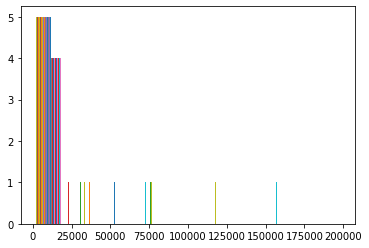

In [19]:
plt.hist(data1)

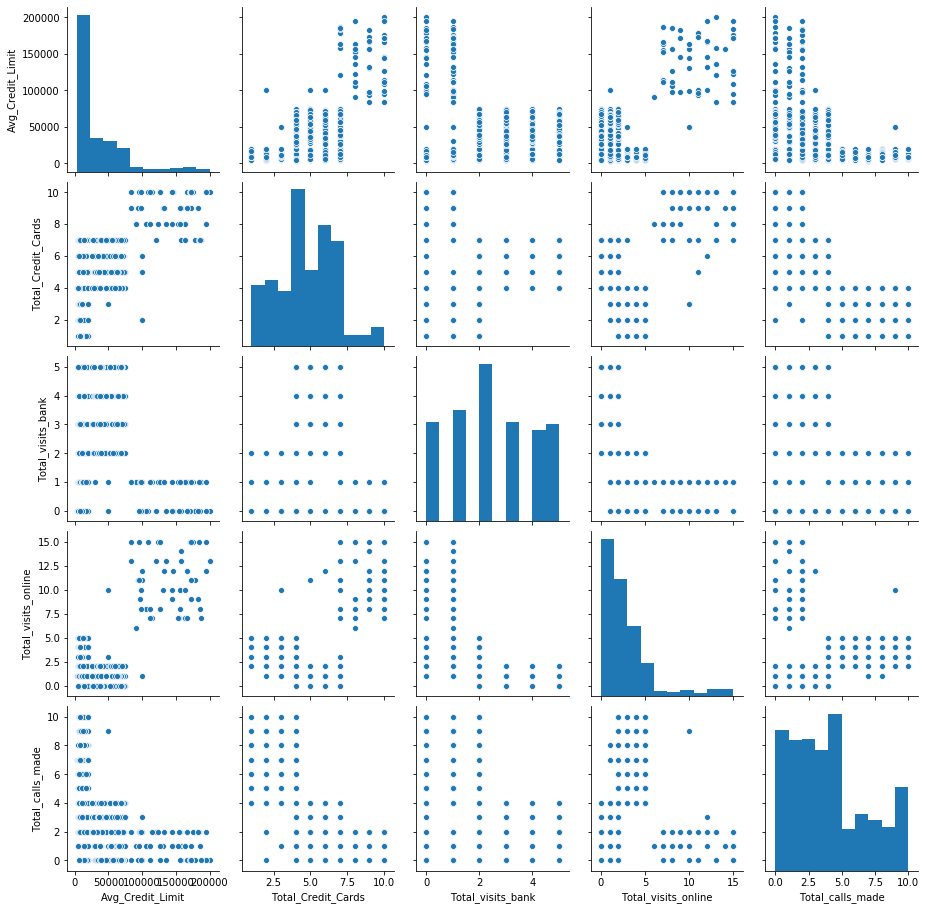

In [20]:
sns.pairplot(data1)
#visulizting if there is any relationships between the variables. Some relationships can be observed. 

In [21]:
data1.corr()
#Findign the corralation between the variables and there are some.

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


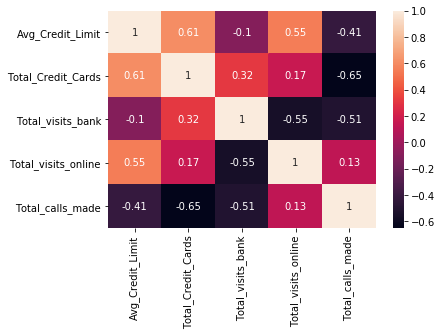

In [22]:
sns.heatmap(data1.corr(), annot=True)
plt.show()
#heatmap can visulize the corralation between the variables. 

# K-mean

In [23]:
data2=data1.apply(zscore)

In [24]:
data2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

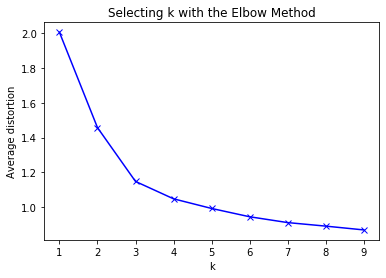

In [25]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data2)
    prediction=model.predict(data2)
    meanDistortions.append(sum(np.min(cdist(data2, model.cluster_centers_, 'euclidean'), axis=1)) / data2.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

seems 3 clusters is the optimal value for k

In [26]:
# K = 3
final_model=KMeans(3)
final_model.fit(data2)
prediction=final_model.predict(data2)

#Append the prediction 
data1["GROUP"] = prediction
data2["GROUP"] = prediction
print("Groups Assigned : \n")
data2.head(10)

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,0
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,2
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,0
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,2
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,2
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,2


In [27]:
data2_Clust = data2.groupby(['GROUP'])
data2_Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,2.831764,1.862226,-1.105763,2.827319,-0.874330
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,-0.595796,-1.059623,-0.901518,0.322997,1.148109


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001512453F808>,
      dtype=object)

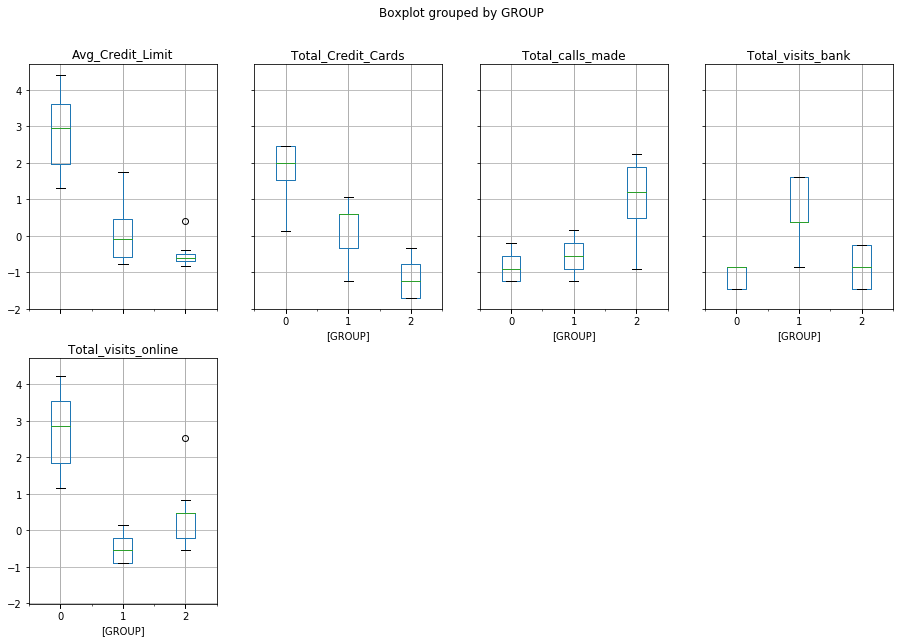

In [28]:
data2.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))


In [29]:
# try K = 4
final_model=KMeans(4)
final_model.fit(data2)
prediction=final_model.predict(data2)

#Append the prediction 
data1["GROUP"] = prediction
data2["GROUP"] = prediction
print("Groups Assigned : \n")
data2.head(10)

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,0
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,2
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,1
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,0
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,0


In [30]:
data2_Clust = data2.groupby(['GROUP'])
data2_Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,-0.596133,-1.060843,-0.898953,0.326900,1.157303
1,0.041973,0.384089,0.048574,-0.563063,-0.533503
2,2.831764,1.862226,-1.105763,2.827319,-0.874330
3,-0.089048,0.356795,1.295713,-0.543901,-0.575064


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015125CB4588>,
      dtype=object)

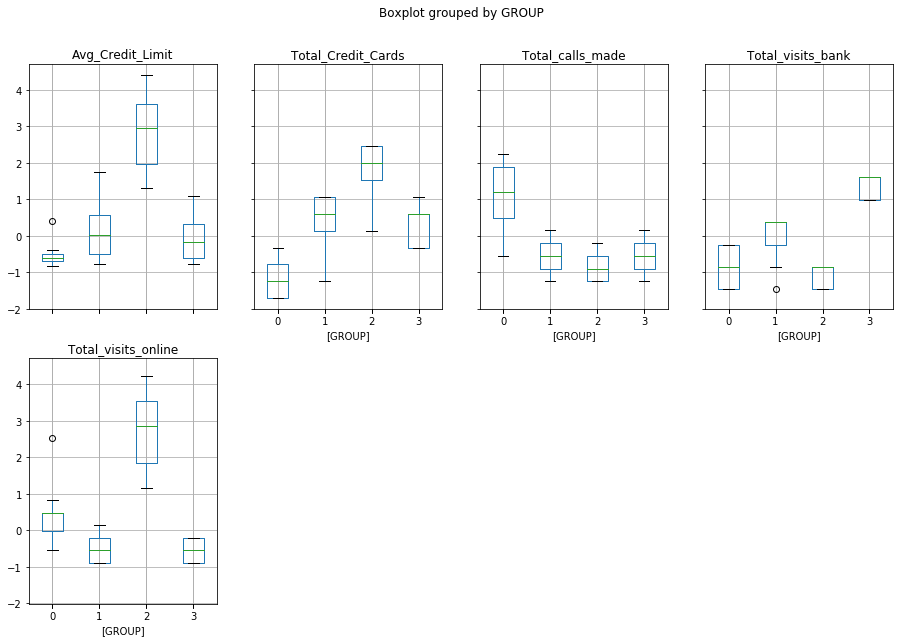

In [31]:
data2.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

k = 3 is better than k = 4 

# Hierarchical Clustering

In [32]:
data3=data2.drop(["GROUP"], axis = 1)

In [33]:
data3.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [34]:
from sklearn.cluster import AgglomerativeClustering 

In [35]:
model.fit(data3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
data3['labels'] = model.labels_
data3.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,7
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,7
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,8
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,1
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,6
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,8
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,3
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,8


In [37]:
data3_Clust = data3.groupby(['labels'])

In [38]:
data3_Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,0.487759,0.516547,1.293696,-0.607145,-0.553005
1,-0.584143,-1.027826,-0.966836,0.398653,1.806324
2,3.012452,1.905313,-1.167091,3.699429,-0.873166
3,-0.600107,-1.360463,-0.926951,0.343752,0.658907
4,-0.441372,0.468075,0.077868,-0.574761,-0.587932
5,-0.508544,0.240612,1.297180,-0.497906,-0.591107
6,2.664975,1.822454,-1.049152,2.022295,-0.875404
7,0.607292,0.333540,0.049361,-0.558728,-0.503110
8,-0.598765,-0.508678,-0.656024,0.056169,0.538452


In [39]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points


In [40]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data3, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(data3))

c

0.8346693331283028

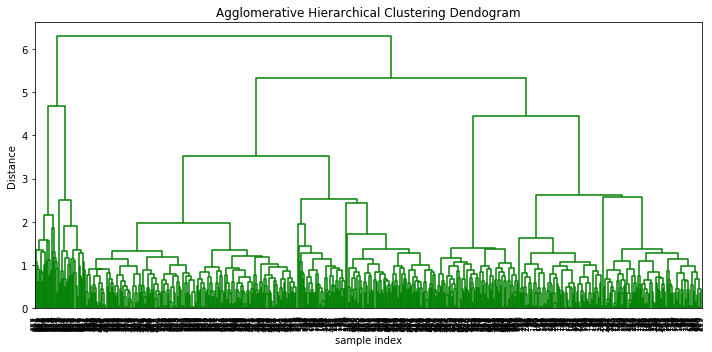

In [41]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [42]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data3, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(data3))

c

0.7972760311833468

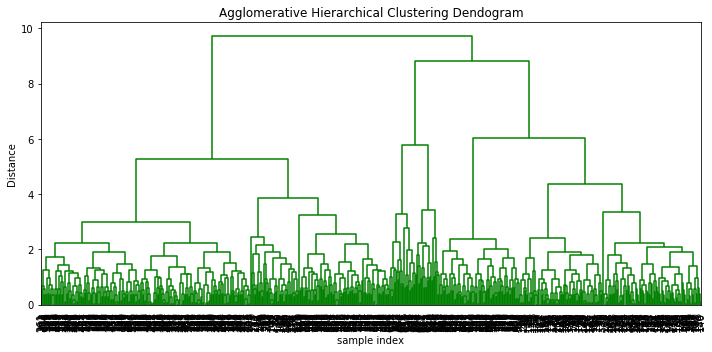

In [43]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [44]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data3, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(data3))

c

0.7600654413020846

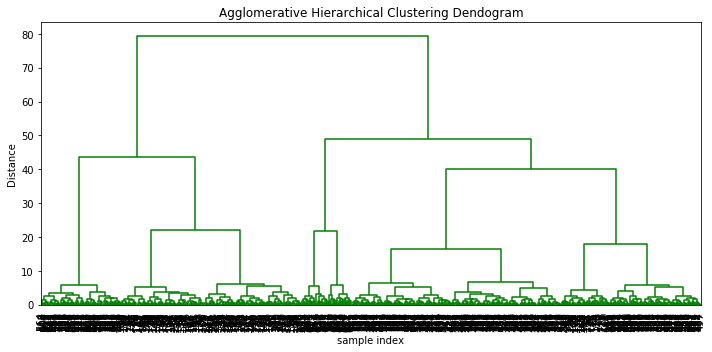

In [45]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000151243A6EC8>,
      dtype=object)

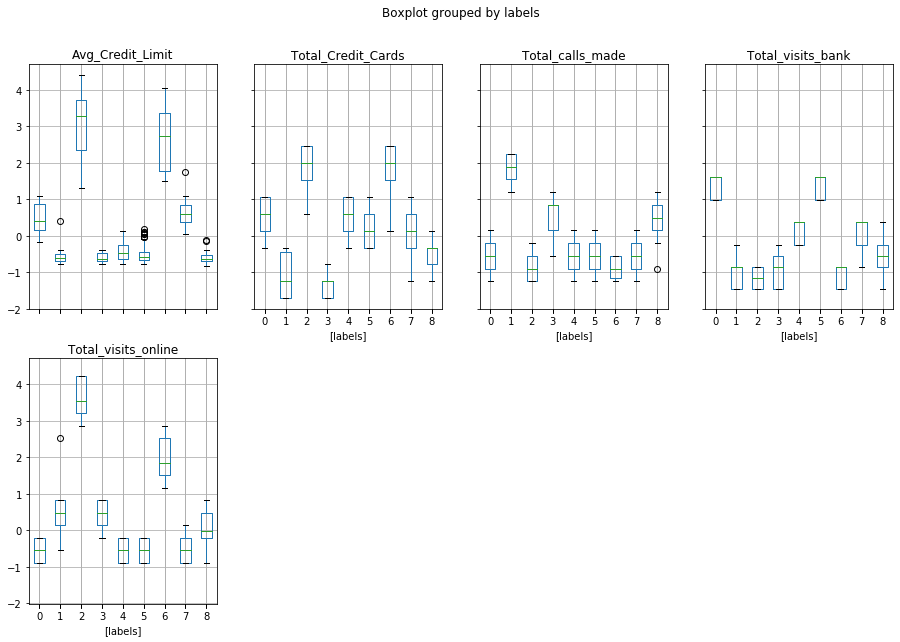

In [46]:
data3.boxplot(by='labels', layout = (2,4),figsize=(15,10))

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from collections import Counter
from scipy.cluster.hierarchy import fcluster

In [48]:
1: [0,1,2,] 
    
2: [3,4,5] 
3: [7,8,0] 
for every obs:
    we calculate silhoutte score
    
    |2 metrics|:
        metric 1: how similar the point is to its own point in the cluster []: average_distance_from_cluster_1
        
        metric 2: how similar the point is to its point in the other clusters: min(average_distance_from_cluster_2,
                                                                                  average_distance_from_cluster_3)
                
        
    
then we take average;;

SyntaxError: invalid syntax (<ipython-input-48-034ffa79d626>, line 5)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
for i in range(2,10):
    ac_cluster = AgglomerativeClustering(n_clusters=i,
                                    linkage='ward',
                                    affinity='euclidean')
    cluster_labels = ac_cluster.fit_predict(data3)
    silhouette_avg = silhouette_score(data3, cluster_labels)
    print(f"cluster size: {i} : {silhouette_avg}")

cluster size: 2 : 0.4184014657826867
cluster size: 3 : 0.46685868400615127
cluster size: 4 : 0.5169442145897702
cluster size: 5 : 0.529130185297183
cluster size: 6 : 0.5253014618333075
cluster size: 7 : 0.5440504809214962
cluster size: 8 : 0.5406209840828984
cluster size: 9 : 0.522286501423811


In [53]:
for i in range(2,10):
    ac_cluster = AgglomerativeClustering(n_clusters=i,
                                    linkage='ward',
                                    affinity='euclidean')
    cluster_labels = ac_cluster.fit_predict(data2)
    silhouette_avg = silhouette_score(data2, cluster_labels)
    print(f"cluster size: {i} : {silhouette_avg}")

cluster size: 2 : 0.4322837624842495
cluster size: 3 : 0.5151208442181704
cluster size: 4 : 0.5103057384126307
cluster size: 5 : 0.40613118135782084
cluster size: 6 : 0.3196901311088357
cluster size: 7 : 0.22957928385642
cluster size: 8 : 0.2348670686740488
cluster size: 9 : 0.21019854467047627


K-mean method prform its best when the K = 3, where the silhouette score is about 0.515
Hierarchical method prform its best when we have 7 clusters, where the silhouette score is about 0.544.

The two models are giving almost the same silhouette score but at deffernt level of clustring. 